# Shreyans Murkute- E20CSE415

### Assignment 12.2.2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


In [4]:
df= pd.read_csv('voice.csv')
df.shape

(3168, 21)

In [5]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [7]:
df.isnull().sum()
#no missing values

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [42]:
X= df.iloc[:, :-1]
y= df.iloc[:, -1]

In [43]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= pd.DataFrame(scaler.fit_transform(X), columns= X.columns)

In [44]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [45]:
pca_model= PCA(n_components= 2)
lda_model= LinearDiscriminantAnalysis(n_components= 1)
X_new_pca= pca_model.fit_transform(X)
X_new_lda= lda_model.fit_transform(X, y)


In [46]:
X_new_lda[:, 1]

IndexError: index 1 is out of bounds for axis 1 with size 1

In [47]:
pca_model.explained_variance_ratio_

array([0.45216391, 0.11870609])

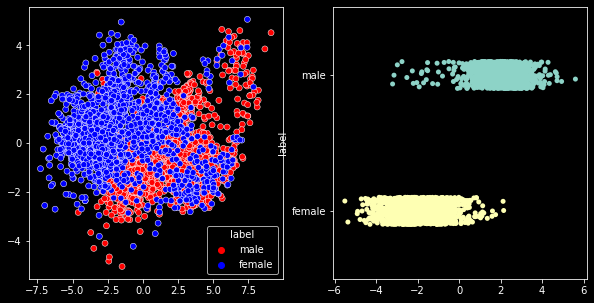

In [55]:
fig, axes= plt.subplots(1, 2, figsize= (10, 5))
sns.scatterplot(x= X_new_pca[:, 0], y=X_new_pca[:, 1], palette= ['red', 'blue'], hue= y, ax= axes[0])
sns.stripplot(x= X_new_lda[:, 0], y =y , ax= axes[1])
plt.show();

In [56]:
from sklearn.cluster import KMeans

In [58]:
X

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,-2.141210,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,-2.141210,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,-2.141210,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,-1.054576,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,-0.790514,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,-1.638842,1.658182,-0.877839,-1.873163,-0.999378,1.579141,-0.325020,-0.221916,1.507749,1.999883,0.460602,-1.638842,1.237885,2.444087,0.114817,0.007024,-0.708404,-0.237556,-0.224892,-0.098989
3164,-2.162452,1.927682,-2.994482,-2.008095,-0.840021,1.820721,-0.577009,-0.252503,1.458418,1.697831,-1.963949,-2.162452,1.429532,-0.124536,0.565959,0.153573,-0.214641,-0.388453,-0.384717,0.871981
3165,-1.298773,2.322724,-0.051973,-2.199039,-0.017123,2.492666,-0.298044,-0.222108,1.150198,1.385857,-2.037497,-1.298773,2.077781,0.140728,0.565959,-0.637833,-0.708404,-0.599266,-0.586717,0.175887
3166,-1.245202,2.012196,-0.017728,-1.991852,-0.204021,2.153653,-0.365367,-0.231123,1.229850,1.505711,0.607848,-1.245202,0.915445,-0.120678,-0.294030,-0.072080,-0.708404,-0.412863,-0.400255,1.149161


In [72]:
KMeans(1).fit(X)

AttributeError: 'NoneType' object has no attribute 'split'

ERROR: Could not find a version that satisfies the requirement threadpoolctl_pypi_0 (from versions: none)
ERROR: No matching distribution found for threadpoolctl_pypi_0


In [74]:
import numpy as np
np.__version__

'1.22.2'

In [103]:
wcss= {}
for k in range(2, 10):
    Km_model= KMeans(n_clusters= k).fit(X)
    wcss[k]= Km_model.inertia_

In [104]:
wcss.values()

dict_values([43845.03436261136, 38361.86989149454, 32178.45004054222, 28927.244085972732, 26344.205148719826, 24882.691248747993, 23838.74062503314, 22806.52350174925])

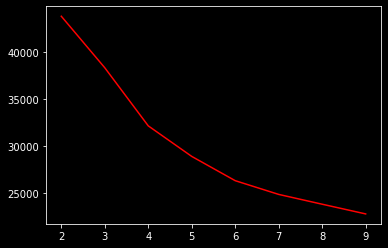

In [105]:
plt.plot(range(2, 10), wcss.values(), 'r-')
plt.show();

In [87]:
#optimal clusters are 2. Ongoing issue with Numpy is not allowing KMeans with 1 clusters to work currently. Issue is ongoing on GitHub. 
#Ideal Clusters are 2 as we already know that the number of classes are 2

In [106]:
Km= KMeans(n_clusters= 2, max_iter= 100)
Km.fit(X)

KMeans(max_iter=100, n_clusters=2)

In [109]:
from sklearn.preprocessing import LabelEncoder
lab= LabelEncoder()
y= lab.fit_transform(y)

In [110]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y, Km.labels_))
print(recall_score(y, Km.labels_))

0.3899895724713243
0.4722222222222222
